In [2]:
par_num = 50000
core_num = 10
# core_list = ['01', '02', '04', '08', '10', '20', '30', '40', '50', '60']
core_list = ['62']
# core_list = ['70','80', '90']
testType = 'TestWeak'
for core_num in core_list:
    if testType == 'TestStrong':
        par_num = 50000# * int(core_num)
    if testType == 'TestWeak':
        par_num = 5000 * int(core_num)
    fname = 'job-scal-' + str(par_num) +'-' + str(core_num)
    fo = open(fname, "w+")
    fo.close()
    fo = open(fname, "a")
    fo.write("#!/bin/bash\n")
    fo.write("#SBATCH -N 1\n")
    fo.write("#SBATCH -C knl\n")
    fo.write("#SBATCH -q debug\n")
    fo.write("#SBATCH -J mpitest\n")
    fo.write("#SBATCH --ntasks-per-node="+str(core_num)+"\n")
    fo.write("#SBATCH -t 00:30:00\n")

    fo.write("#modules\n")
    fo.write("module load openmpi\n")

    fo.write("#run the application:\n")
    fo.write("for seed in 10\n")
    fo.write("do\n")
    fo.write("    for par_num in "+ str(par_num) +"\n")
    fo.write("    do\n")
    fo.write("        srun ../mpi -s $seed -n $par_num > ./out/"+testType+"."+str(core_num)+"."+str(par_num) +".out\n")
    fo.write("    done\n")
    fo.write("done\n")
    fo.close()

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

def Least_squares(x,y):
    x_ = x.mean()
    y_ = y.mean()
    m = np.zeros(1)
    n = np.zeros(1)
    k = np.zeros(1)
    p = np.zeros(1)
    for i in np.arange(x.shape[0]):
        k = (x[i]-x_)* (y[i]-y_)
        m += k
        p = np.square( x[i]-x_ )
        n = n + p
    a = m/n
    b = y_ - a* x_
    return a,b

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [9]:
def drawResult(X,xname,Y,yname,ref = True):
    
    if ref:
        a,b = Least_squares(np.array(X),np.array(Y))
        Yref = a * X + b
        plt.plot(X,Yref, '-o')

    plt.plot(X,Y, '-o')            
#     plt.title('Serial time Curve')

    plt.xlabel(xname)
    plt.ylabel(yname)

In [3]:
def showResult(testType = "TestStrong"):
    print(testType)
    direc = './out/'
    fnames = os.listdir(direc)
    file_to_objects = {}
    Npart = []
    Ncore = []
    Times = []
    fnames.sort()
    for filename in fnames:
        if filename.endswith(".out"):
            if filename.startswith(testType):
                info = filename.split('.')
                Ncore.append(int(info[1]))
                inputHandler = open(direc+filename, "r")
                listOfLines = inputHandler.readlines()
                inputHandler.close()
                for line in listOfLines:
                    if line.startswith('Simulation Time'):
                        line = line.split(' ')
                        Times.append(float(line[3]))
                        Npart.append(int(line[6]))
                        

    return Ncore, Npart, Times


Test2
[256] [1000, 2000, 4000, 8000, 10000, 16000, 20000, 32000, 40000, 64000, 80000, 128000, 160000, 256000] [0.286128, 0.548478, 1.07437, 2.12815, 2.65263, 4.22929, 5.2767, 9.27554, 11.5903, 30.8573, 46.2741, 148.003, 185.044, 444.093]


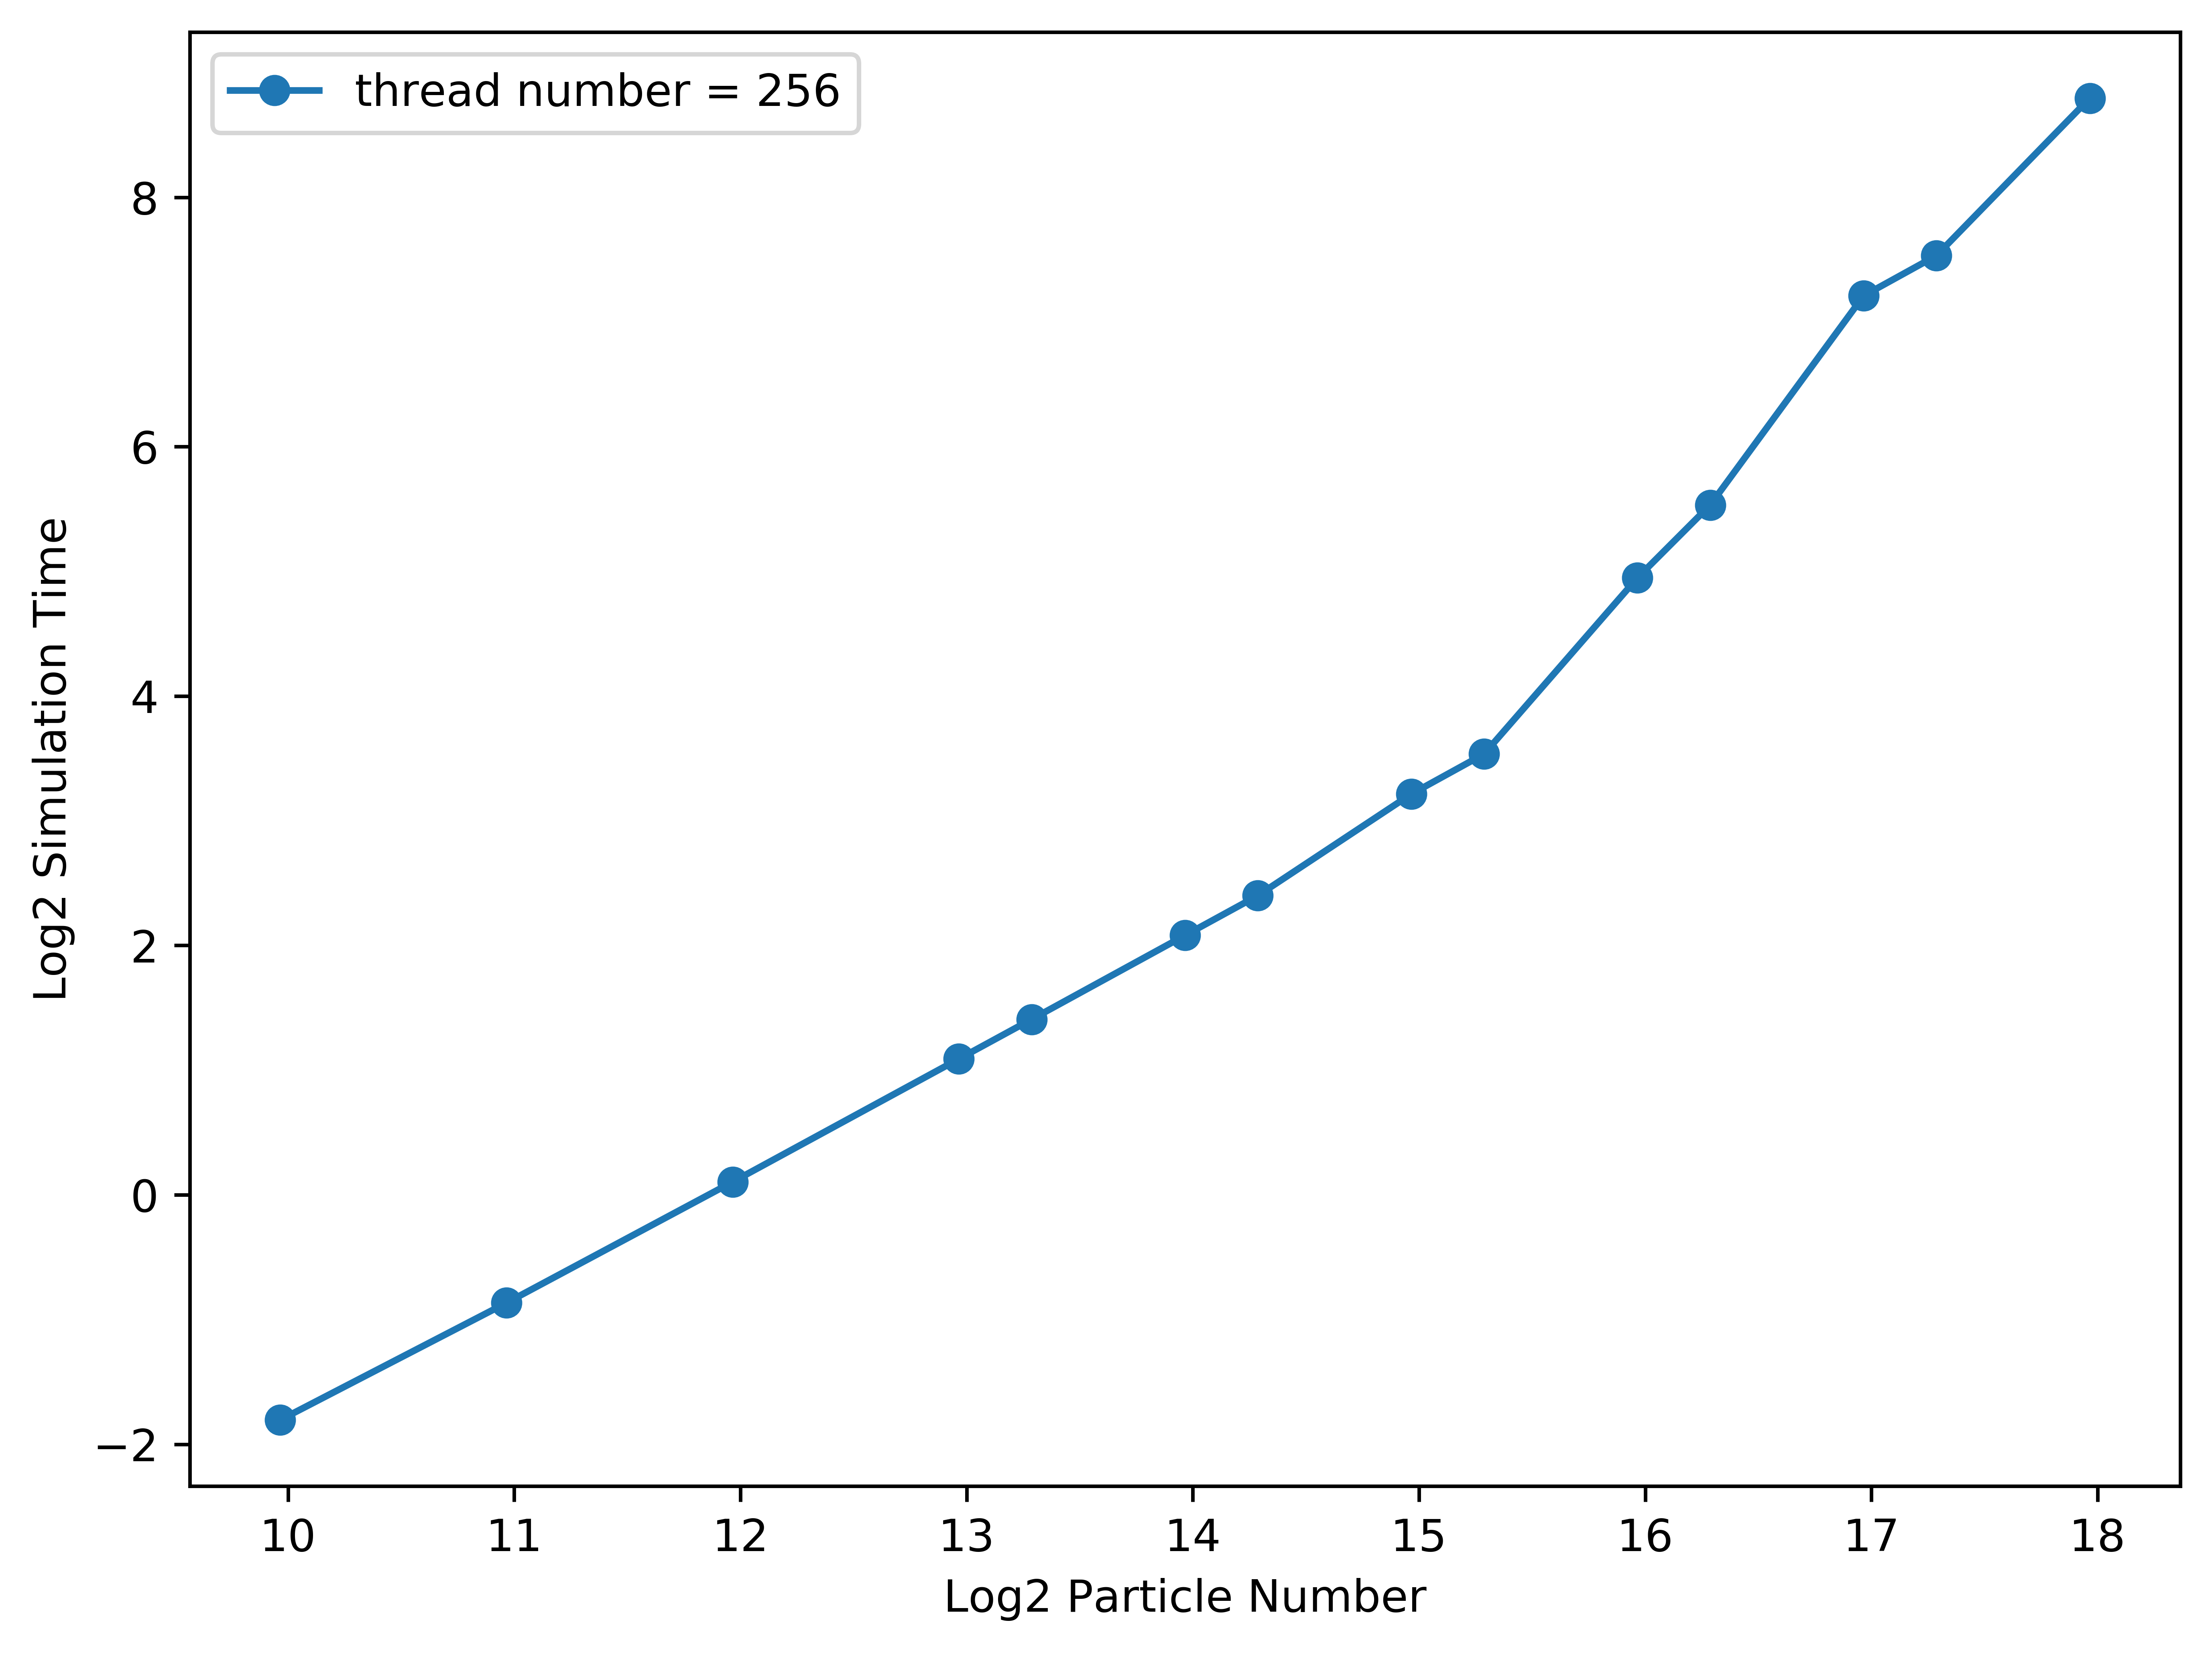

In [19]:
# Log - Log Naive
plt.figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')
Ncore,Npart,Times = showResult("Test2")
print(Ncore,Npart,Times)
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)
plt.legend(['thread number = %d'%(Ncore[0])], loc='upper left')
plt.show()

Test2
[256] [1000, 2000, 4000, 8000, 10000, 16000, 20000, 32000, 40000, 64000, 80000, 128000, 160000, 256000] [0.286128, 0.548478, 1.07437, 2.12815, 2.65263, 4.22929, 5.2767, 9.27554, 11.5903, 30.8573, 46.2741, 148.003, 185.044, 444.093]
Test3
[256] [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2560000] [0.0290548, 0.0335578, 0.0575824, 0.133746, 0.290773, 0.625458, 1.55465, 3.5769, 7.77843]


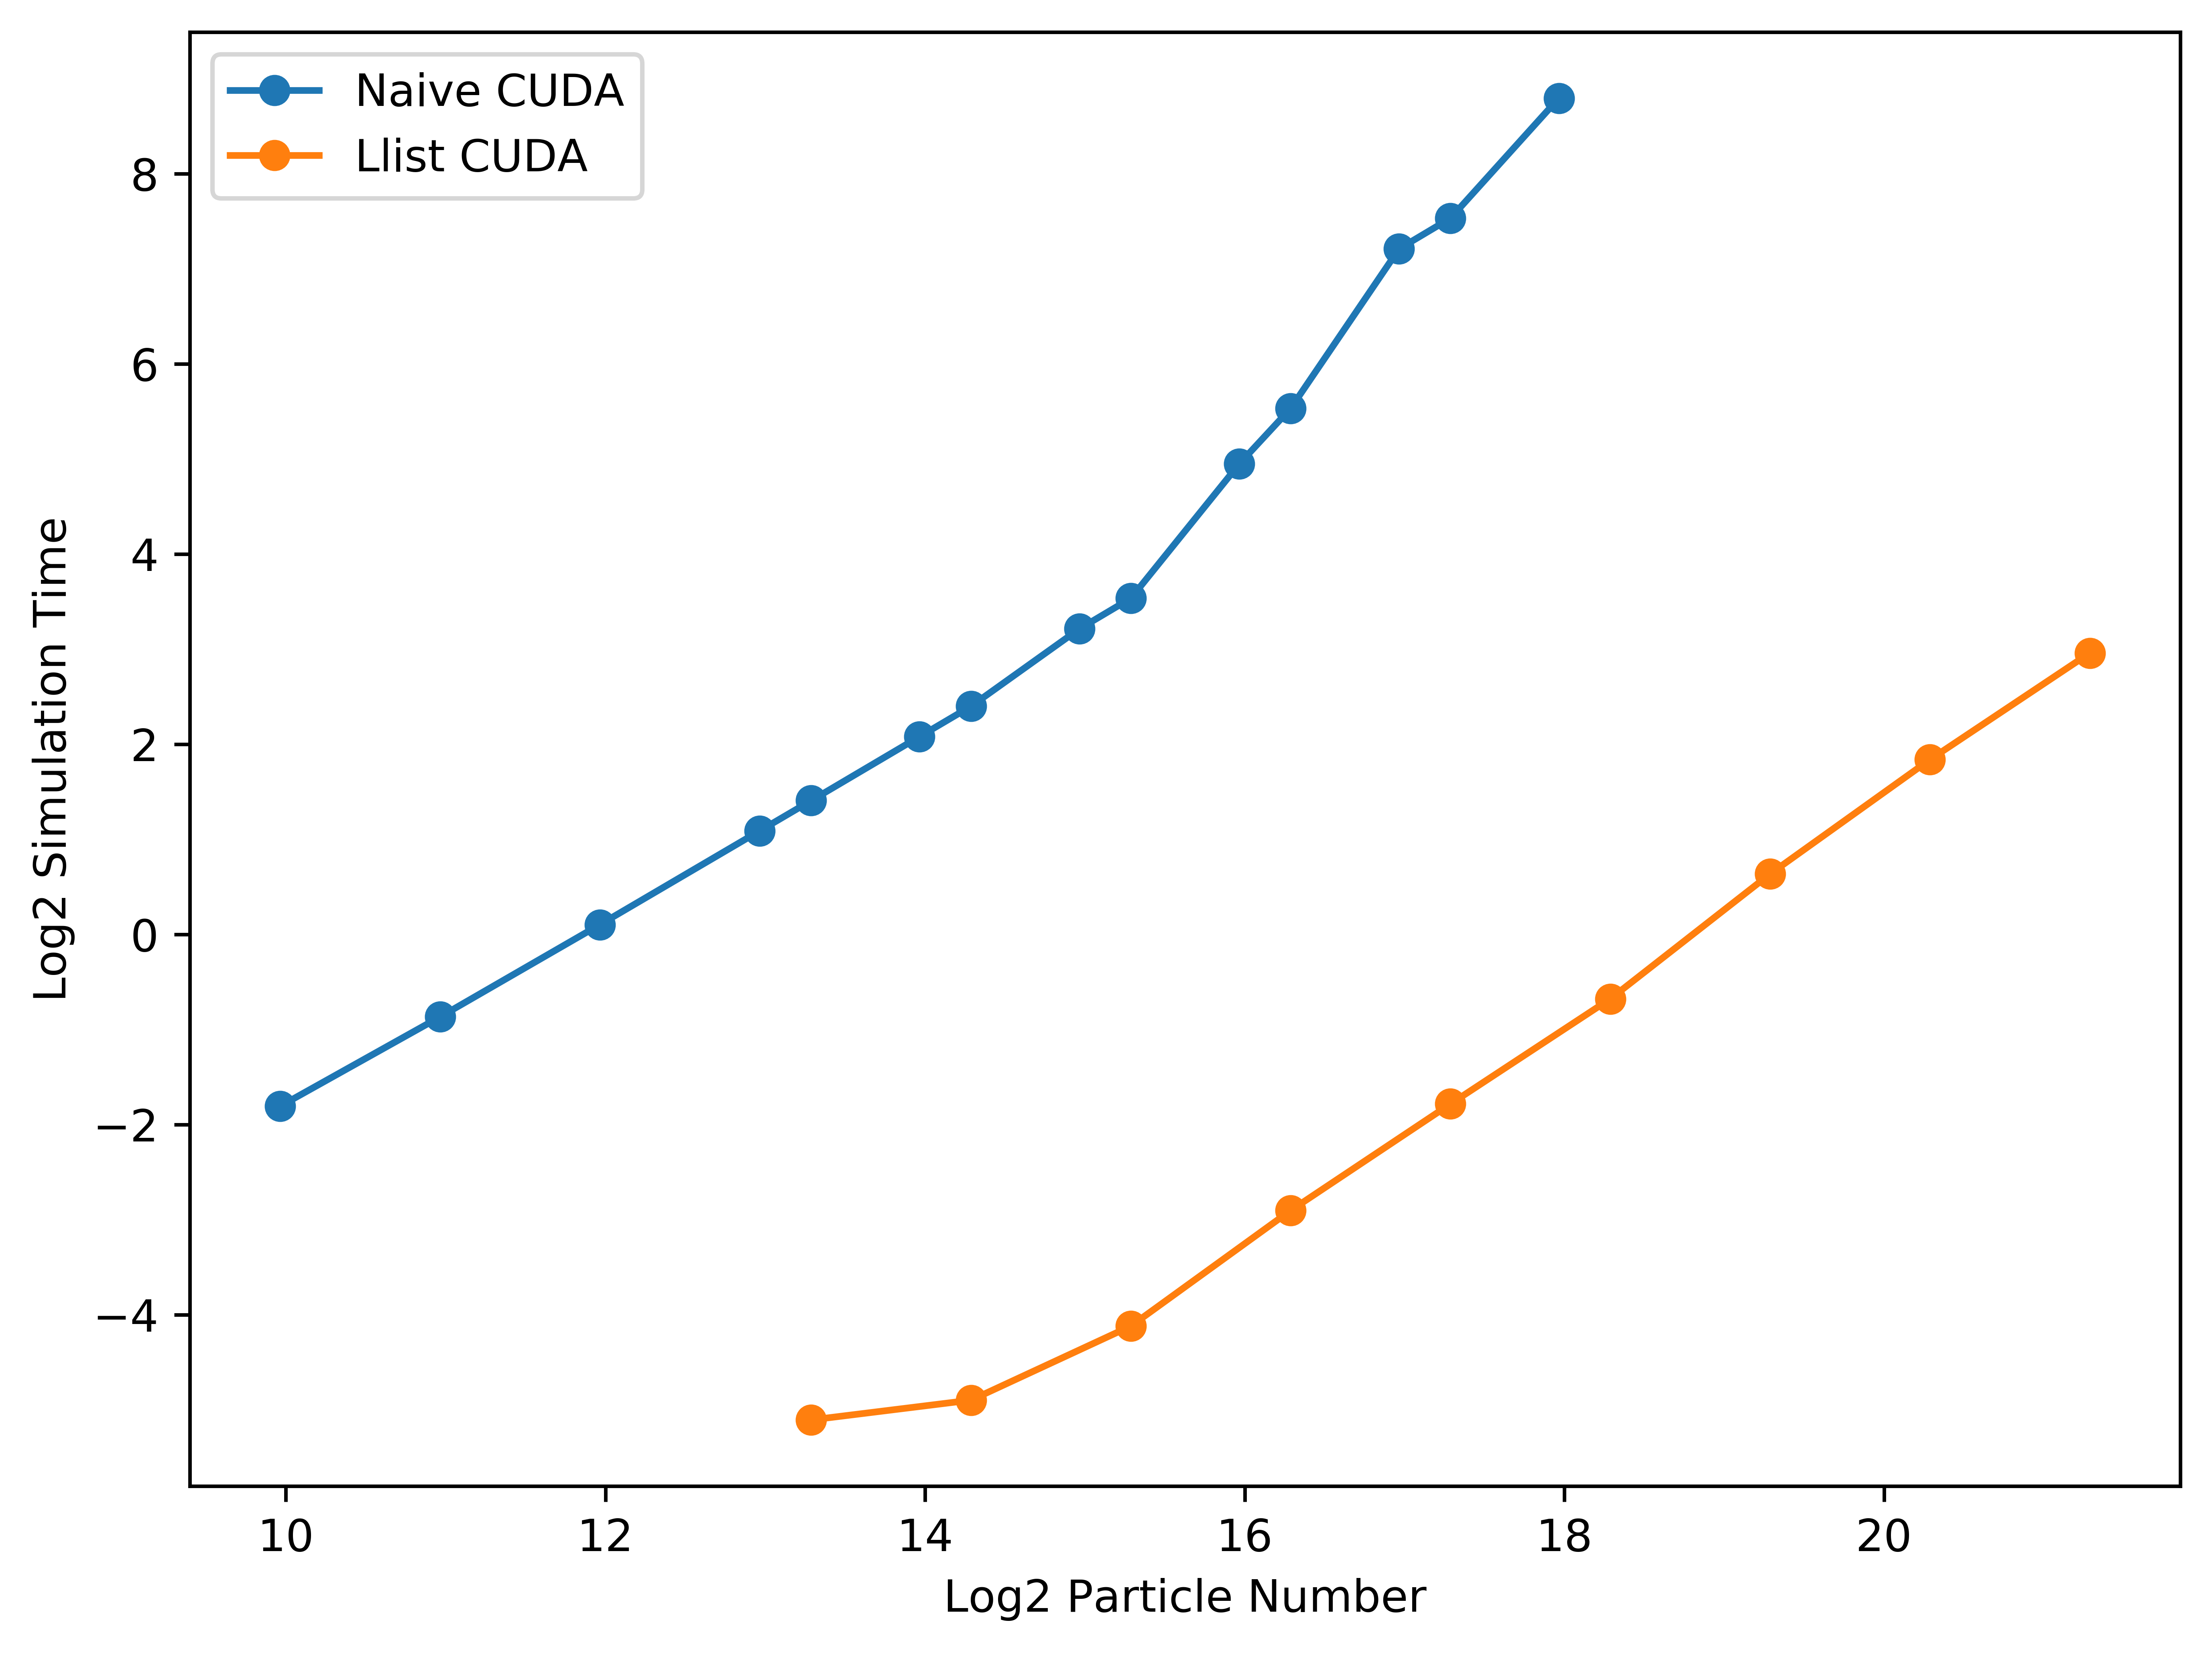

In [20]:
# Log - Log mine
plt.figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')
Ncore,Npart,Times = showResult("Test2")
print(Ncore,Npart,Times)
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)
Ncore,Npart,Times = showResult("Test3")
print(Ncore,Npart,Times)
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)
plt.legend(['Naive CUDA', 'Llist CUDA'], loc='upper left')
# plt.legend(['thread number = %d'%(Ncore[0])], loc='upper left')

plt.show()

Test3
[256] [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000, 2560000] [0.0290548, 0.0335578, 0.0575824, 0.133746, 0.290773, 0.625458, 1.55465, 3.5769, 7.77843]


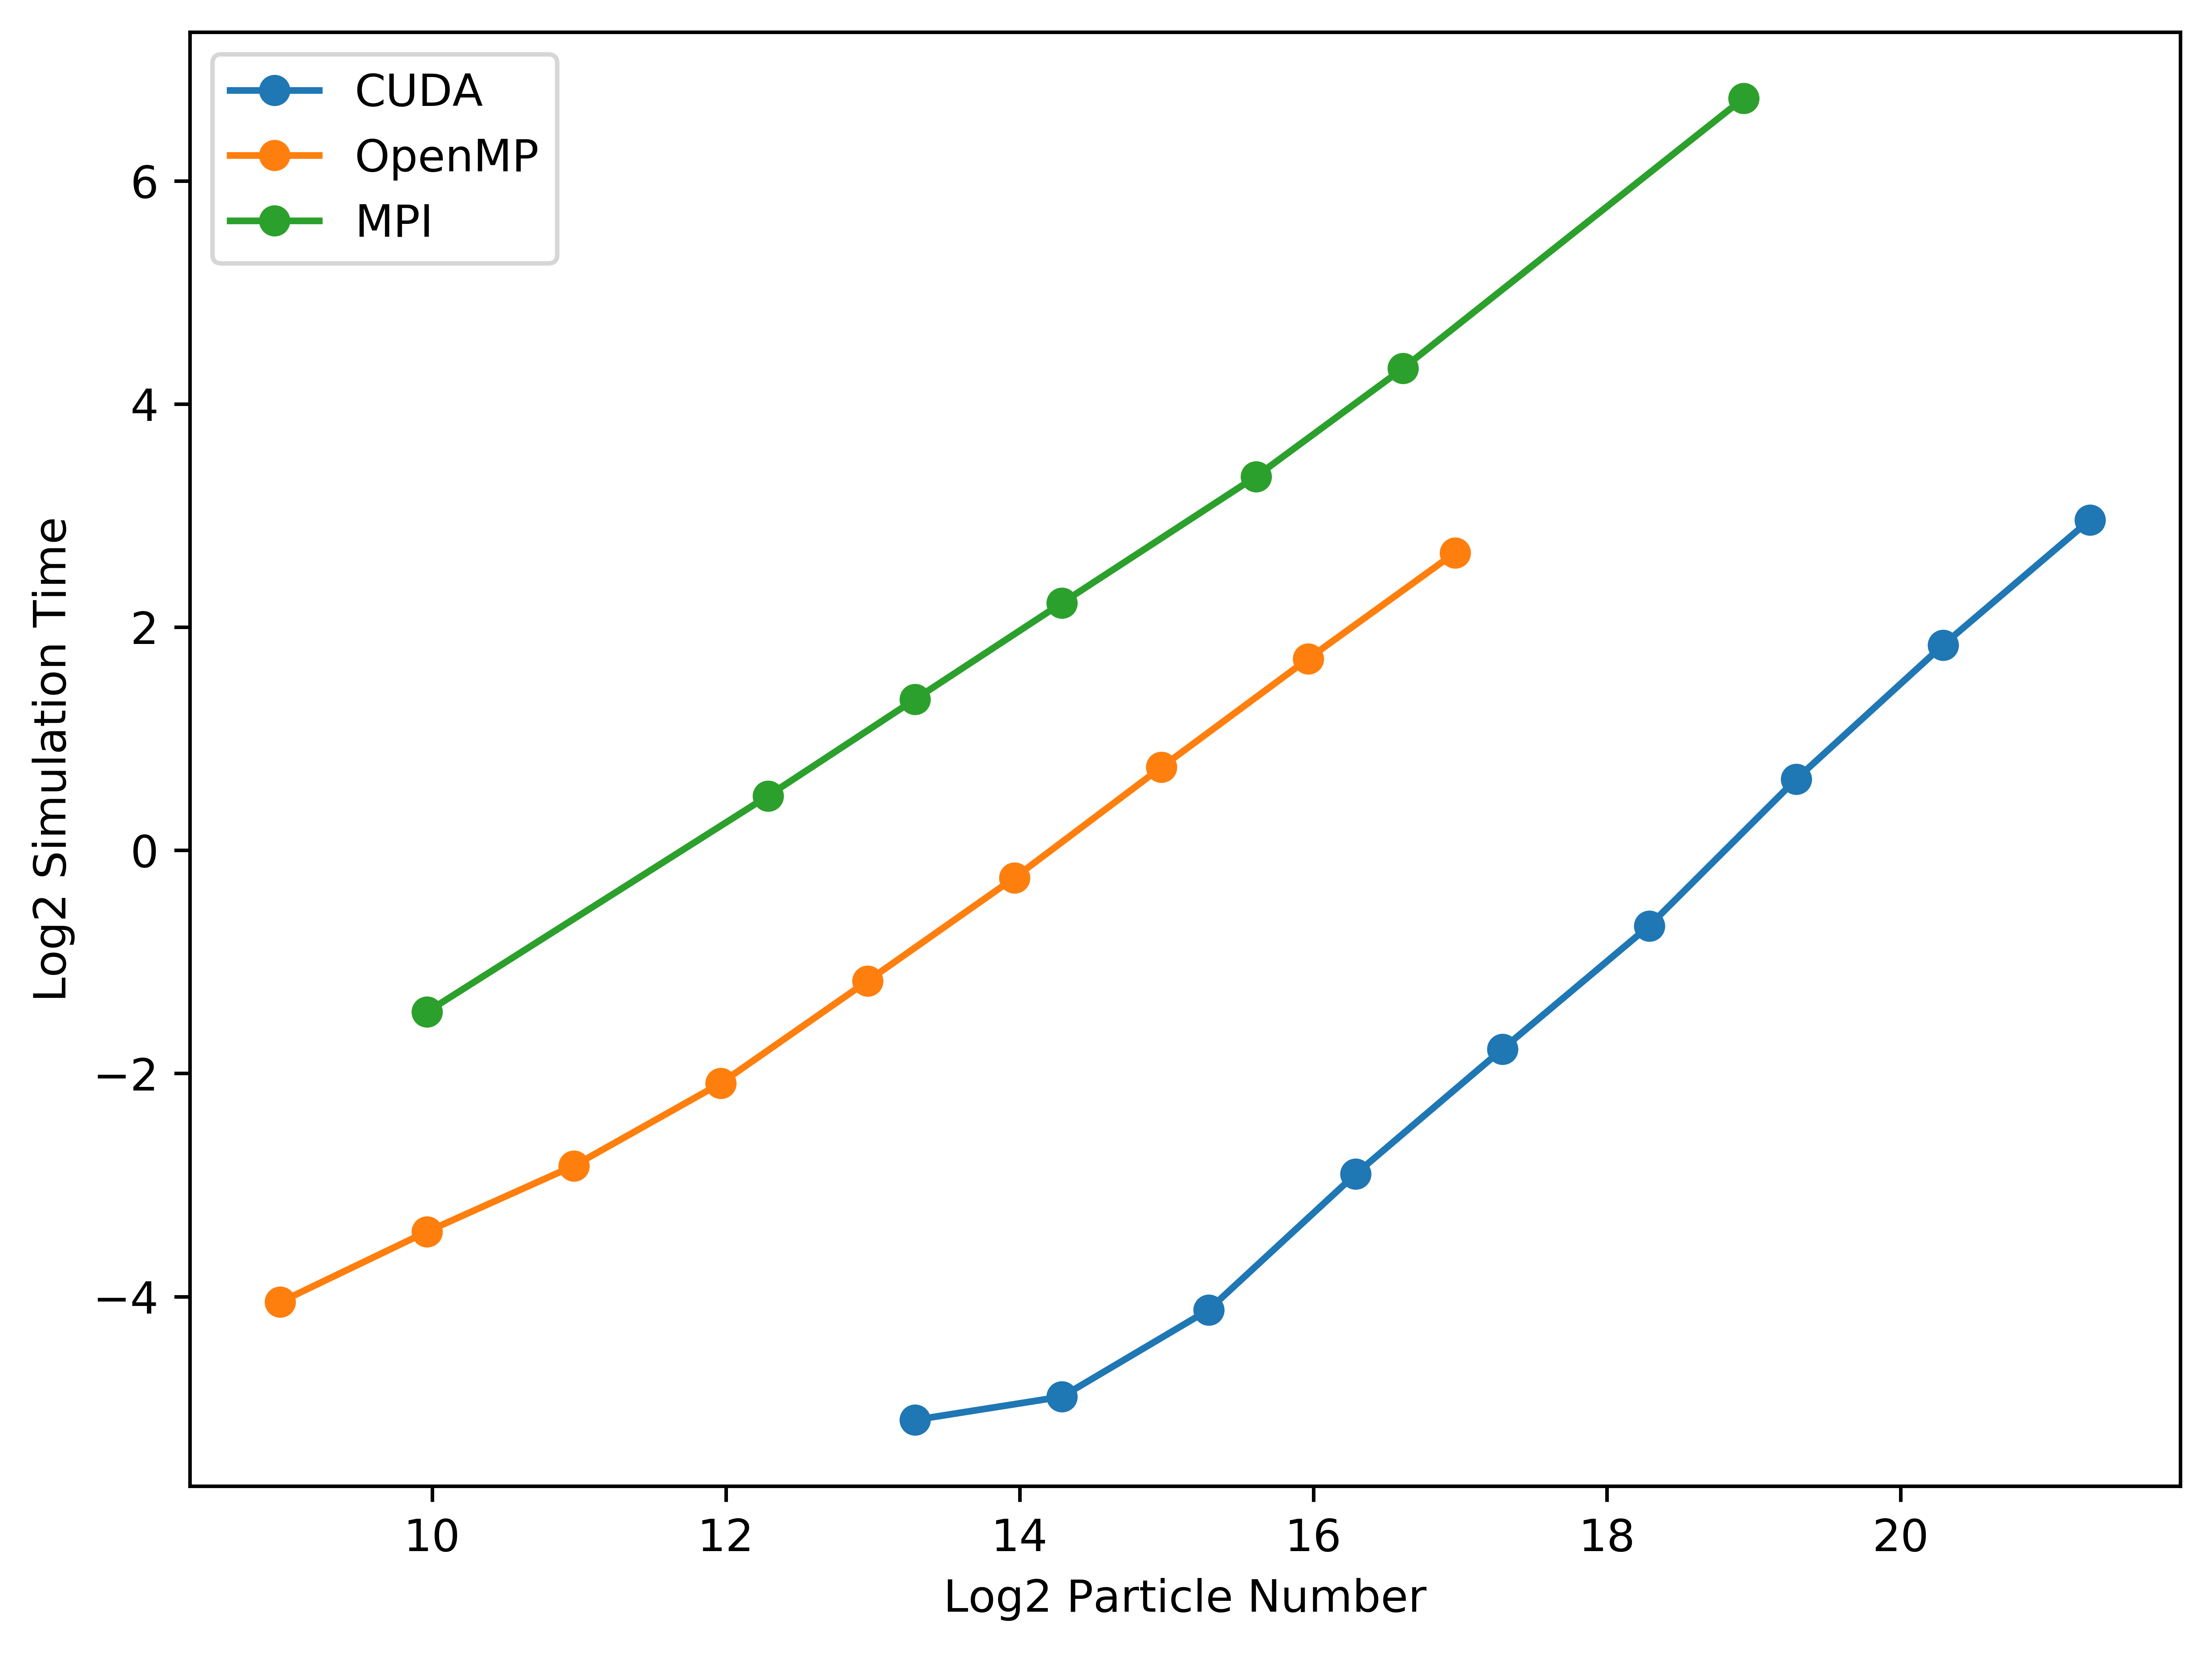

In [22]:
# Log - Log mine
plt.figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

Ncore,Npart,Times = showResult("Test3")
print(Ncore,Npart,Times)
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)

Times = [0.0604347, 0.0936268, 0.140909, 0.235283, 0.444227, 0.843295, 1.67476, 3.28697, 6.35022]
#OpenMP
Npart = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000] 
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)


Npart = [1000, 5000, 10000, 20000, 50000, 100000, 500000] #MPI
Times = [0.366572, 1.40255, 2.55372, 4.64505, 10.1926, 19.9411, 106.956]
drawResult(np.log2(Npart),'Log2 Particle Number',np.log2(Times),'Log2 Simulation Time', False)


plt.legend(['CUDA', 'OpenMP', 'MPI'], loc='upper left')
# plt.legend(['thread number = %d'%(Ncore[0])], loc='upper left')

plt.show()